# Bootstrap Code Examples

In [24]:
import stats

ModuleNotFoundError: No module named 'stats'

In [27]:
import scipy

In [28]:
scipy.stats.norm.cdf

<bound method rv_continuous.cdf of <scipy.stats._continuous_distns.norm_gen object at 0x00000224ACDB6D60>>

In [1]:
from scipy.stats import pearsonr, skewnorm
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import pandas as pd
import numpy as np
import scipy

In [1]:
df_duncan = sm.datasets.get_rdataset("Duncan", "carData").data

df_duncan.loc[df_duncan['type'] == 'prof', 'type'] = 'professional'
df_duncan.loc[df_duncan['type'] == 'wc', 'type'] = 'white-collar'
df_duncan.loc[df_duncan['type'] == 'bc', 'type'] = 'blue-collar'

df_professional = df_duncan.loc[(df_duncan['type'] == 'professional')]
df_blue_collar = df_duncan.loc[(df_duncan['type'] == 'blue-collar')]

In [2]:
df_duncan.head()

,type,income,education,prestige
accountant,professional,62,86,82
pilot,professional,72,76,83
architect,professional,75,92,90
author,professional,55,90,76
chemist,professional,64,86,90


In [3]:
df_duncan.shape

(45, 4)

## 95% Confidence Intervals

In [4]:
def plot_distributions(n_replicas, professional_sample, blue_collar_sample, professional_label, blue_collar_label, p=5):

    professional_sample = pd.Series(professional_sample)
    blue_collar_sample = pd.Series(blue_collar_sample)

    fig, ax = plt.subplots(2, 1, figsize=(10,8))

    ax[0].hist(professional_sample, alpha=.3, bins=20)

    ax[0].axvline(professional_sample.mean(), color='black', linewidth=5) # sampling distribution mean
    ax[0].axvline(np.percentile(professional_sample, p/2.), color='red', linewidth=3, alpha=0.99) # 95% CI Lower limit (if bootstrapping)
    ax[0].axvline(np.percentile(professional_sample, 100-p/2.), color='red', linewidth=3, alpha=0.99) # 95% CI Upper Limit  (if bootstrapping)
    ax[0].title.set_text(str(professional_label) + "\nn = {} Resamples".format(n_replicas))

    ax[1].hist(blue_collar_sample, alpha=.3, bins=20)
    ax[1].axvline(blue_collar_sample.mean(), color='black', linewidth=5) # sampling distribution mean
    ax[1].axvline(np.percentile(blue_collar_sample, p/2.), color='red', linewidth=3, alpha=0.99) # 95% CI Lower limit (if bootstrapping)
    ax[1].axvline(np.percentile(blue_collar_sample, 100-p/2.), color='red', linewidth=3, alpha=0.99) # 95% CI Upper Limit (if bootstrapping)
    ax[1].title.set_text(str(blue_collar_label) + "\nn = {} Resamples".format(n_replicas))

    if n_replicas > 1:
        print("Lower confidence interval limit: ", np.percentile(round(professional_sample,4), p/2.))
        print("Upper confidence interval limit: ", np.percentile(round(professional_sample,4), 100-p/2.))
        print("Mean: ", round(professional_sample,4).mean())
        print("Standard Error: ", round(professional_sample.std() / np.sqrt(n_replicas), 4) )
        
        print("Lower confidence interval limit: ", np.percentile(round(blue_collar_sample,4), p/2.))
        print("Upper confidence interval limit: ", np.percentile(round(blue_collar_sample,4), 100-p/2.))
        print("Mean: ", round(blue_collar_sample,4).mean())
        print("Standard Error: ", round(blue_collar_sample.std() / np.sqrt(n_replicas), 4) )

    else:
        print("At least two samples required to create the following statistics:\nConfidence Intervals\nMean\nStandard Error")

### Original Data
In the original dataset, there are 18 income data points for "professional" job types and 21 data points for "blue-collar" job types. The 95% confidence interval for the professional job type ranges from 29.50 to 79.15. That interval ranges from 7.00 to 64.00 for blue-collar job types. Based on the visual below, there is reasonable overlap in the income differences, which causes the overlapping confidence intervals. However, there is a very small sample size.

Using the standard deviation and the mean of the two separate sample distributions, we can run a bootstrap to simulate an addition of 1000 income measures for each group, preserving a relative proportion of each profession in the dataset (accountant, store manager, etc.). After performing the bootstrapping procedure, we can see income is now distributed in roughly Gaussian (bell curve) form. This shows that new samples were distributed around the mean using the obtained standard deviation of the original sample distributions. Furthermore, the confidence intervals no longer overlap. The implication of the separation of the 95% confidence intervals between the professional and blue-collar groups is that there is now statistically significant difference in the incomes of the two job types.

### Plotting incomes from the original data
Note that df_professional['income'] and df_blue_collar['income'] are used directly. This is because this is not a bootstrap; the function only plots the histograms, mean incomes, and the 5th and 95th percentiles.

At least two samples required to create the following statistics:
Confidence Intervals
Mean
Standard Error


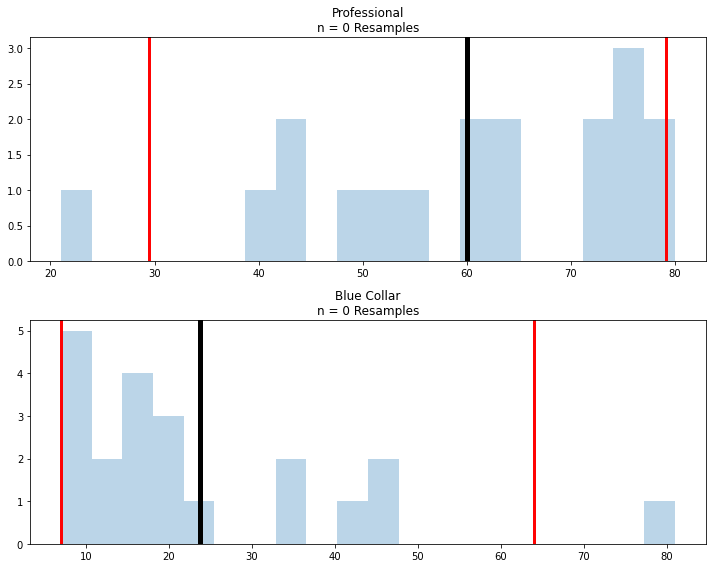

In [5]:
n_replicas=0

plot_distributions(n_replicas=n_replicas,
                   professional_sample=df_professional['income'], blue_collar_sample=df_blue_collar['income'],
                   professional_label="Professional", blue_collar_label="Blue Collar")

plt.tight_layout()

plt.savefig('./{}.png'.format(n_replicas), dpi=300)

### Sample multiple random subsets of each dataset and build sampling distributions using their means (this is bootstrapping)

Lower confidence interval limit:  49.1111
Upper confidence interval limit:  69.6667
Mean:  60.099955900000126
Standard Error:  0.0527
Lower confidence interval limit:  14.5
Upper confidence interval limit:  35.8
Mean:  23.721500000000013
Standard Error:  0.0555


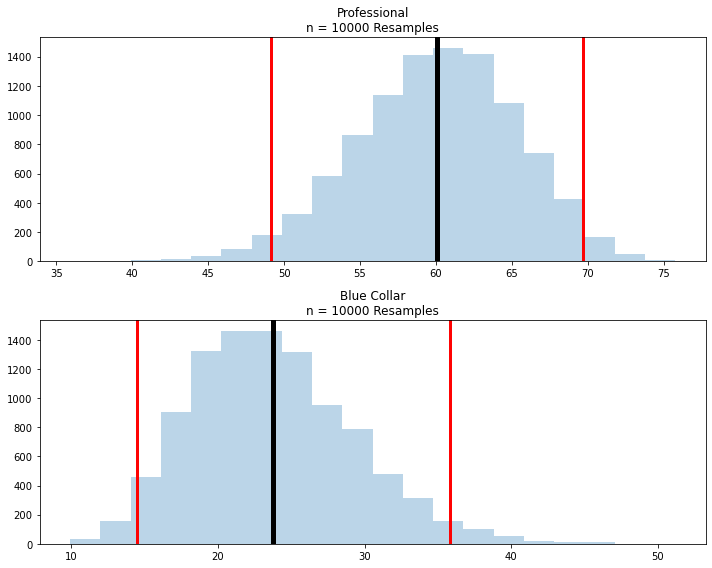

In [6]:
n_replicas = 10000

professional_bootstrap_means = [df_professional.sample(frac=0.5, replace=True)['income'].mean()
                                for i in range(n_replicas)]

blue_collar_bootstrap_means = [df_blue_collar.sample(frac=0.5, replace=True)['income'].mean()
                               for i in range(n_replicas)]

plot_distributions(n_replicas=n_replicas,
                   professional_sample=professional_bootstrap_means, blue_collar_sample=blue_collar_bootstrap_means,
                   professional_label="Professional", blue_collar_label="Blue Collar")

plt.tight_layout()

plt.savefig('./{}.png'.format(n_replicas), dpi=300)

## Correlation Analysis

#### Correlation between incomes from the original data (sampled 10 each):

In [7]:
# Taking a sample of 10 since there are unequal amounts of blue collar and professional income samples and equal
# lengths are required to calculate Pearson's Corrleation

df_prof_corr = df_professional.sample(n=10)
df_blue_corr = df_blue_collar.sample(n=10)

# Correlation using Pearson's Correlation equation
corr, _ = scipy.stats.pearsonr(df_prof_corr['income'], df_blue_corr['income'])
print("Correlation between professional and blue-collar incomes using original data: ", corr)

Correlation between professional and blue-collar incomes using original data:  0.31813512835857644


#### Correlation between incomes from the bootstrap sampled data:

In [8]:
n_replicas = 10000

# 'frac=0.5' samples 50% of the data (just an arbitrary rate)
professional_bootstrap_means = pd.Series([df_prof_corr.sample(frac=0.5, replace=False)['income'].mean()
                                          for i in range(n_replicas)]) 

blue_collar_bootstrap_means = pd.Series([df_blue_corr.sample(frac=0.5, replace=False)['income'].mean()
                                         for i in range(n_replicas)]) 

corr, _ = pearsonr(professional_bootstrap_means, blue_collar_bootstrap_means) 
print("Correlation between professional and blue-collar incomes with {} bootstrapped replicas: {}".format(n_replicas,
                                                                                                          corr))

Correlation between professional and blue-collar incomes with 10000 bootstrapped replicas: 0.010673393783952611


## Standard Error Analysis

#### Standard error for the incomes of the original data:

In [9]:
print("Standard Error for Professional Incomes: ", scipy.stats.sem(df_professional['income']))
print("Standard Error for Blue-Collar Incomes: ", scipy.stats.sem(df_blue_collar['income']))

Standard Error for Professional Incomes:  3.8488366990680394
Standard Error for Blue-Collar Incomes:  3.9526391195086723


#### Standard error for the incomes of the bootstrap sampled data:

In [10]:
n_replicas = 10000

# 'frac=0.5' samples 50% of the data (just an arbitrary rate)
professional_bootstrap_means = pd.Series([df_professional.sample(frac=0.5, replace=False)['income'].mean()
                                          for i in range(n_replicas)]) 

blue_collar_bootstrap_means = pd.Series([df_blue_collar.sample(frac=0.5, replace=False)['income'].mean()
                                         for i in range(n_replicas)])

print("Standard Error for Bootstrapped Professional Incomes: ", scipy.stats.sem(professional_bootstrap_means))
print("Standard Error for Bootstrapped Blue-Collar Incomes: ", scipy.stats.sem(blue_collar_bootstrap_means))

Standard Error for Bootstrapped Professional Incomes:  0.03867212567000367
Standard Error for Bootstrapped Blue-Collar Incomes:  0.04101906252108903


## Standard Deviation Analysis

#### Standard deviation for the incomes of the original data:

In [11]:
print("Standard Deviation for Professional Incomes: ", scipy.stats.sem(df_professional['income']))
print("Standard Deviation for Blue-Collar Incomes: ", scipy.stats.sem(df_blue_collar['income']))

Standard Deviation for Professional Incomes:  3.8488366990680394
Standard Deviation for Blue-Collar Incomes:  3.9526391195086723


#### Standard deviation for the incomes of the bootstrap sampled data:

In [12]:
n_replicas = 10000

# 'frac=0.5' samples 50% of the data (just an arbitrary rate)
professional_bootstrap_means = pd.Series([df_professional.sample(frac=0.5, replace=False)['income'].mean()
                                          for i in range(n_replicas)]) 

blue_collar_bootstrap_means = pd.Series([df_blue_collar.sample(frac=0.5, replace=False)['income'].mean()
                                         for i in range(n_replicas)])

print("Standard Deviation for Bootstrapped Professional Incomes: ", np.std(professional_bootstrap_means))
print("Standard Deviation for Bootstrapped Blue-Collar Incomes: ", np.std(blue_collar_bootstrap_means))

Standard Deviation for Bootstrapped Professional Incomes:  3.932956062007158
Standard Deviation for Bootstrapped Blue-Collar Incomes:  4.161829985847575


# Chapter Images

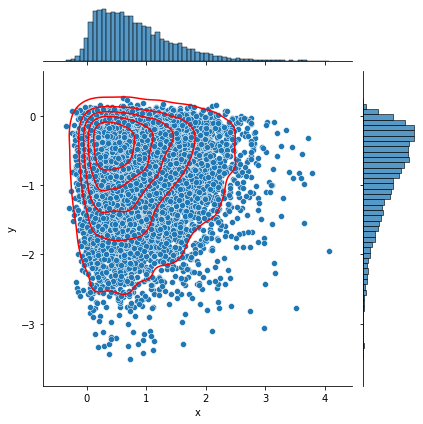

In [86]:
r_skew = skewnorm.rvs(9, size=10000)
l_skew = skewnorm.rvs(-12, size=10000)

df_skew = pd.DataFrame({'x':r_skew,
                         'y':l_skew})

g = sns.jointplot(data=df_skew, x="x", y="y")
g.plot_joint(sns.kdeplot, color="r", zorder=1, levels=6)
plt.savefig('./df_skew.png', dpi=300)

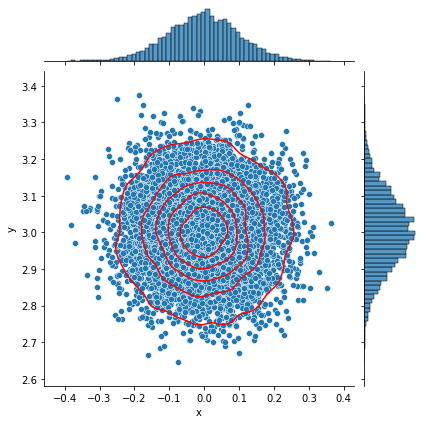

In [85]:
mu_x, sigma_x = 0, 0.1
mu_y, sigma_y = 3, 0.1

y = np.random.normal(mu_x, sigma_x, 10000)
x = np.random.normal(mu_y, sigma_y, 10000)

df_normal = pd.DataFrame({'x':y,
                         'y':x})

g = sns.jointplot(data=df_normal, x="x", y="y")
g.plot_joint(sns.kdeplot, color="r", zorder=1, levels=6)
plt.savefig('./df_normal.png', dpi=300)

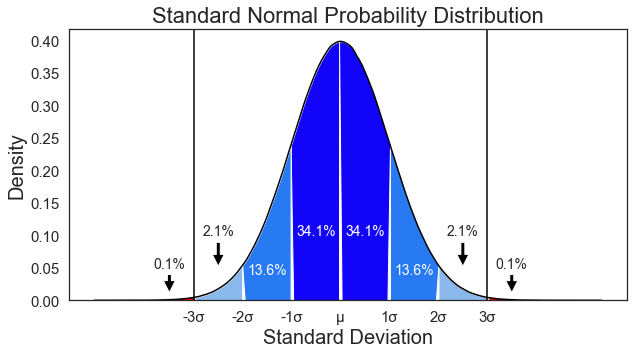

In [25]:
import warnings
warnings.filterwarnings('ignore')

data = np.random.randn(10000000)

x_neg1 = -1 * np.std(data)
x_1 = 1 * np.std(data)
x_neg2 = -2 * np.std(data)
x_2 = 2 * np.std(data)
x_neg3 = -3 * np.std(data)
x_3 = 3 * np.std(data)

sns.set(rc={'figure.figsize':(10,5)})
sns.set_style('white')

ax = sns.distplot(data, hist=False, color='black')
x_benchmark, y_benchmark = ax.lines[0].get_data()

ax.fill_between(x_benchmark, y_benchmark, where=(x_benchmark < 0) & (x_benchmark > x_neg1),
                interpolate=True, color='#1203F9', edgecolor='white')

ax.fill_between(x_benchmark, y_benchmark, where=(x_benchmark < x_neg1) & (x_benchmark > x_neg2),
                interpolate=True, color='#277AF2', edgecolor='white')

ax.fill_between(x_benchmark, y_benchmark, where=(x_benchmark < x_neg2) & (x_benchmark > x_neg3),
                interpolate=True, color='#8BB8EB', edgecolor='white')

ax.fill_between(x_benchmark, y_benchmark, where=(x_benchmark < x_neg3),
                interpolate=True, color='red', edgecolor='red')

ax.fill_between(x_benchmark, y_benchmark, where=(x_benchmark > 0) & (x_benchmark < x_1),
                interpolate=True, color='#1203F9', edgecolor='white')

ax.fill_between(x_benchmark, y_benchmark, where=(x_benchmark > x_1) & (x_benchmark < x_2),
                interpolate=True, color='#277AF2', edgecolor='white')

ax.fill_between(x_benchmark, y_benchmark, where=(x_benchmark > x_2) & (x_benchmark < x_3),
                interpolate=True, color='#8BB8EB', edgecolor='white')

ax.fill_between(x_benchmark, y_benchmark, where=(x_benchmark > x_3),
                interpolate=True, color='red', edgecolor='red')

ax.set_xlabel('Standard Deviation', fontsize=20)
ax.set_ylabel('Density', fontsize=20)
ax.set_xticks(range(-3,4))
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xticklabels(['-3σ','-2σ','-1σ','μ','1σ','2σ','3σ'])
ax.set_title('Standard Normal Probability Distribution', fontsize=22)

ax.annotate('34.1%',
            xy=(-0.5 * np.std(data) * np.std(data), 0.10),
            xytext=(-0.5 * np.std(data), 0.10), ha='center', color='white',
            arrowprops=None, fontsize=14)

ax.annotate('34.1%',
            xy=(0.5 * np.std(data) * np.std(data), 0.10),
            xytext=(0.5 * np.std(data), 0.10), ha='center', color='white',
            arrowprops=None, fontsize=14)

ax.annotate('13.6%',
            xy=(-1.5 * np.std(data) * np.std(data), 0.04),
            xytext=(-1.5 * np.std(data), 0.04), ha='center', color='white',
            arrowprops=None, fontsize=14)

ax.annotate('13.6%',
            xy=(1.5 * np.std(data) * np.std(data), 0.04),
            xytext=(1.5 * np.std(data), 0.04), ha='center', color='white',
            arrowprops=None, fontsize=14)

ax.annotate('2.1%',
            xy=(-2.5 * np.std(data), 0.05),
            xytext=(-2.5 * np.std(data), 0.10), ha='center',
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize=14)

ax.annotate('2.1%',
            xy=(2.5 * np.std(data), 0.05),
            xytext=(2.5 * np.std(data), 0.10), ha='center',
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize=14)

ax.annotate('0.1%',
            xy=(-3.5 * np.std(data), 0.01),
            xytext=(-3.5 * np.std(data), 0.05), ha='center',
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize=14)

ax.annotate('0.1%',
            xy=(3.5 * np.std(data), 0.01),
            xytext=(3.5 * np.std(data), 0.05), ha='center',
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize=14)

ax.axvline(x = -3 * np.std(data), color='black')
ax.axvline(x = 3 * np.std(data), color='black')

plt.savefig('./StandardNormalDistribution.png', dpi=300)